In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
math = pd.read_csv('/content/student-mat.csv')
port = pd.read_csv('/content/student-por.csv')
data = pd.concat([math, port]).reset_index().drop(columns=['index'])

In [3]:
data.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

In [4]:
data.head(20)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [5]:
data['gt3_famsize'] = data['famsize'].map({'GT3': 1, 'LE3': 0})

In [6]:
def map_binary(val):
    return 1 if (val == 'yes') else 0

cols_to_map = ['schoolsup', 'famsup', 'romantic', 'paid', 'activities', 'nursery', 'higher', 'internet']

data[cols_to_map] = data[cols_to_map].applymap(map_binary)

In [7]:
# check for missing values
print(data.isnull().sum())

school         0
sex            0
age            0
address        0
famsize        0
Pstatus        0
Medu           0
Fedu           0
Mjob           0
Fjob           0
reason         0
guardian       0
traveltime     0
studytime      0
failures       0
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher         0
internet       0
romantic       0
famrel         0
freetime       0
goout          0
Dalc           0
Walc           0
health         0
absences       0
G1             0
G2             0
G3             0
gt3_famsize    0
dtype: int64


In [8]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,gt3_famsize
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,...,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,0.113985,0.613027,0.210728,0.494253,...,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954,0.706897
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.317945,0.487291,0.408021,0.500207,...,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796,0.455404
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000,1.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000,1.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,1.000000


In [9]:
#Parents living together feature
data['Pstatus'] = data['Pstatus'].map({'A': 0, 'T': 1})
#Living in a city feature
data['address'] = data['address'].map({'U': 1, 'R': 0})
pd.set_option('display.max_columns', None)  # or 1000
display(data)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,gt3_famsize
0,GP,F,18,1,GT3,0,4,4,at_home,teacher,course,mother,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6,1
1,GP,F,17,1,GT3,1,1,1,at_home,other,course,father,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6,1
2,GP,F,15,1,LE3,1,1,1,at_home,other,other,mother,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10,0
3,GP,F,15,1,GT3,1,4,2,health,services,home,mother,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15,1
4,GP,F,16,1,GT3,1,3,3,other,other,home,father,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,0,GT3,1,2,3,services,other,course,mother,1,3,1,0,0,0,1,0,1,1,0,5,4,2,1,2,5,4,10,11,10,1
1040,MS,F,18,1,LE3,1,3,1,teacher,services,course,mother,1,2,0,0,1,0,0,1,1,1,0,4,3,4,1,1,1,4,15,15,16,0
1041,MS,F,18,1,GT3,1,1,1,other,other,course,mother,2,2,0,0,0,0,1,1,1,0,0,1,1,1,1,1,5,6,11,12,9,1
1042,MS,M,17,1,LE3,1,3,1,services,services,course,mother,2,1,0,0,0,0,0,0,1,1,0,2,4,5,3,4,2,6,10,10,10,0


In [10]:
# Create new target variable that is the average of Dalc and Walc
data['alc'] = (data['Dalc'] + data['Walc']) / 2

# Convert the alc variable to binary by thresholding at the median value
data['target'] = data['alc'] > data['alc'].median()

# Print the distribution of the new target variable
print(data['target'].value_counts())

False    573
True     471
Name: target, dtype: int64


In [11]:
data['target'] = data['target'].map({True: 1, False: 0})

In [12]:
data = data.drop('alc', axis=1) 

In [13]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Convert the 'school' column
data['school'] = le.fit_transform(data['school'])

# Convert the 'sex' column
data['sex'] = le.fit_transform(data['sex'])

# Convert the 'Mjob' column
data['Mjob'] = le.fit_transform(data['Mjob'])

# Convert the 'Fjob' column
data['Fjob'] = le.fit_transform(data['Fjob'])

# Convert the 'reason' column
data['reason'] = le.fit_transform(data['reason'])

# Convert the 'guardian' column
data['guardian'] = le.fit_transform(data['guardian'])

In [14]:
# Convert the 'famsize' column
data['famsize'] = le.fit_transform(data['famsize'])

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   school       1044 non-null   int64
 1   sex          1044 non-null   int64
 2   age          1044 non-null   int64
 3   address      1044 non-null   int64
 4   famsize      1044 non-null   int64
 5   Pstatus      1044 non-null   int64
 6   Medu         1044 non-null   int64
 7   Fedu         1044 non-null   int64
 8   Mjob         1044 non-null   int64
 9   Fjob         1044 non-null   int64
 10  reason       1044 non-null   int64
 11  guardian     1044 non-null   int64
 12  traveltime   1044 non-null   int64
 13  studytime    1044 non-null   int64
 14  failures     1044 non-null   int64
 15  schoolsup    1044 non-null   int64
 16  famsup       1044 non-null   int64
 17  paid         1044 non-null   int64
 18  activities   1044 non-null   int64
 19  nursery      1044 non-null   int64
 20  higher  

In [16]:
from scipy import stats

# calculate Z-scores for each column
z = np.abs(stats.zscore(data))

# define threshold
threshold = 3

# remove rows with Z-scores greater than threshold
data = data[(z < threshold).all(axis=1)]


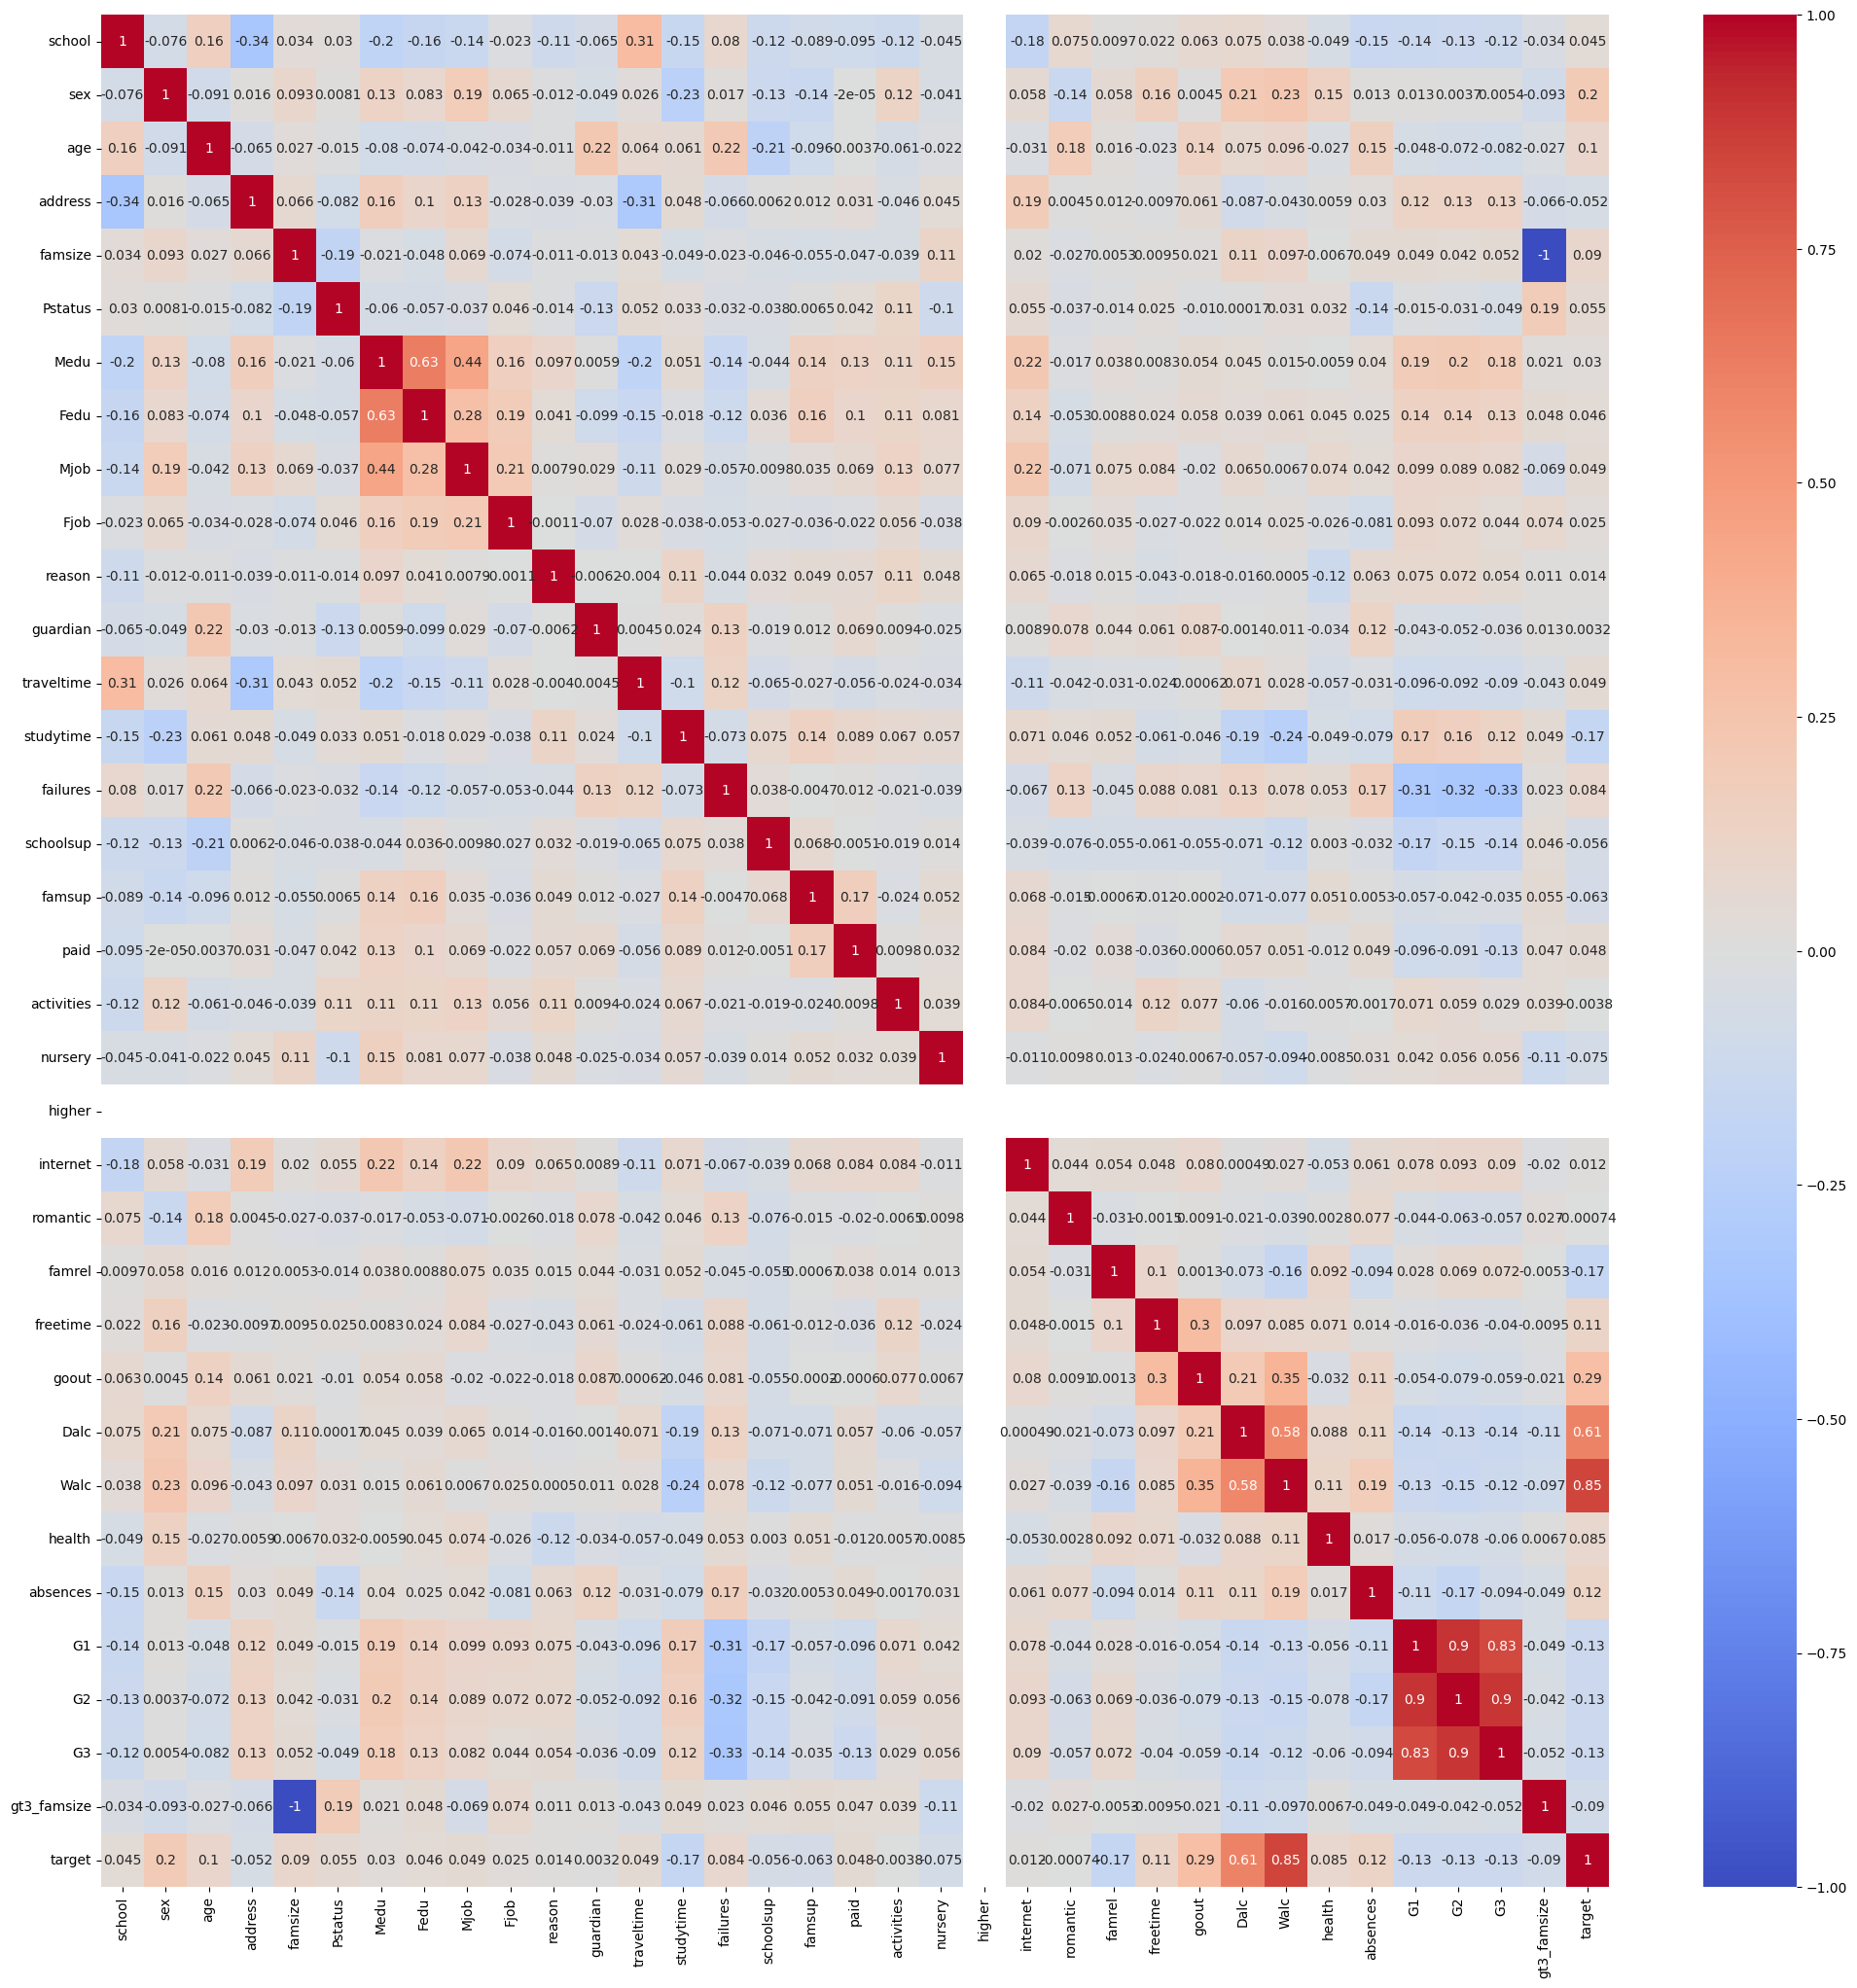

In [17]:
# create correlation heatmap
plt.figure(figsize=(25,25))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [18]:
data = data.drop('higher', axis=1)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 855 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   school       855 non-null    int64
 1   sex          855 non-null    int64
 2   age          855 non-null    int64
 3   address      855 non-null    int64
 4   famsize      855 non-null    int64
 5   Pstatus      855 non-null    int64
 6   Medu         855 non-null    int64
 7   Fedu         855 non-null    int64
 8   Mjob         855 non-null    int64
 9   Fjob         855 non-null    int64
 10  reason       855 non-null    int64
 11  guardian     855 non-null    int64
 12  traveltime   855 non-null    int64
 13  studytime    855 non-null    int64
 14  failures     855 non-null    int64
 15  schoolsup    855 non-null    int64
 16  famsup       855 non-null    int64
 17  paid         855 non-null    int64
 18  activities   855 non-null    int64
 19  nursery      855 non-null    int64
 20  internet 

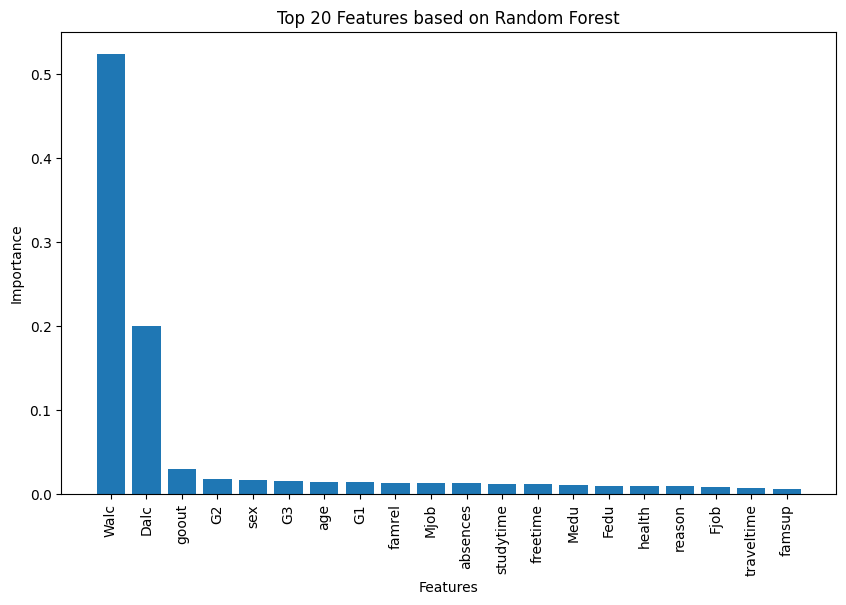

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

# Select top 10 features using random forest
from sklearn.ensemble import RandomForestClassifier
X = data.drop('target', axis=1) 
y = data['target']

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
top_20_features = importance.sort_values('Importance', ascending=False)[:20]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(top_20_features['Feature'], top_20_features['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 20 Features based on Random Forest')
plt.show()


In [21]:
top_20_features

,Feature,Importance
26,Walc,0.524203
25,Dalc,0.199487
24,goout,0.029708
30,G2,0.017947
1,sex,0.016478
31,G3,0.015211
2,age,0.013608
29,G1,0.013594
22,famrel,0.013409
8,Mjob,0.012630


In [30]:
from sklearn.linear_model import LinearRegression

# Split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the linear regression model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Make predictions on test set
y_pred = reg.predict(X_test)

# Evaluate the model
from sklearn.metrics import r2_score, mean_squared_error
print('R-squared:', r2_score(y_test, y_pred))
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))

R-squared: 0.7501666041796444
RMSE: 0.2422913895710039


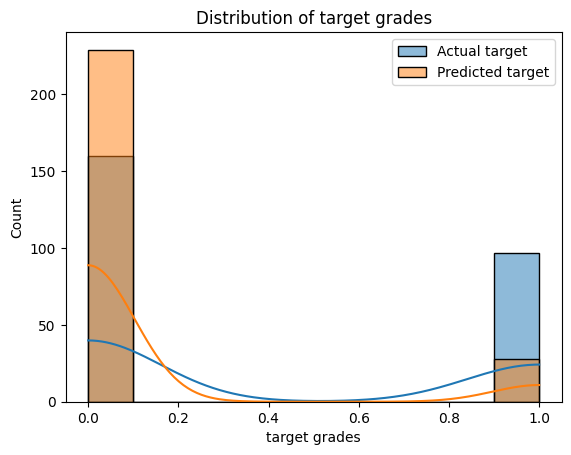

In [31]:
import matplotlib.pyplot as plt
y_pred = y_pred.astype(int)
import seaborn as sns
sns.histplot(y_test, kde=True, label='Actual target')
sns.histplot(y_pred, kde=True, label='Predicted target')
plt.xlabel('target grades')
plt.ylabel('Count')
plt.title('Distribution of target grades')
plt.legend()
plt.show()

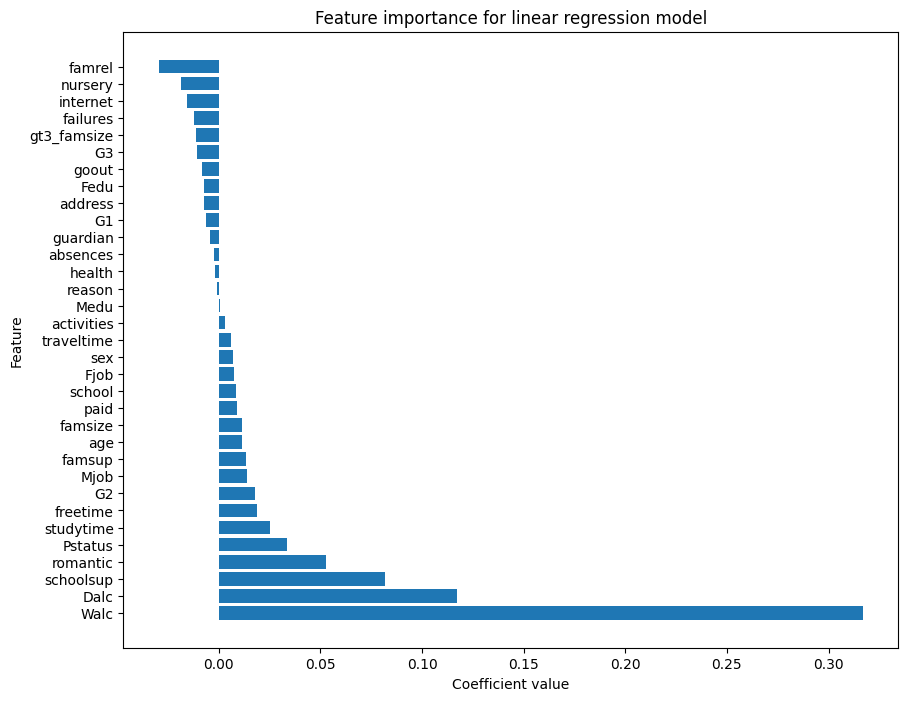

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# # Fit a linear regression model
reg = LinearRegression().fit(X_train, y_train)
# Get the coefficient values of each feature
coef_values = reg.coef_
# Get the feature names
feature_names = X.columns
# Sort the coefficients in descending order
sorted_idx = np.argsort(coef_values)[::-1]
# Plot the coefficient values of each feature
plt.figure(figsize=(10,8))
plt.barh(feature_names[sorted_idx], coef_values[sorted_idx])
plt.xlabel('Coefficient value')
plt.ylabel('Feature')
plt.title('Feature importance for linear regression model')
plt.show()

Positive and negative correlation between features and target variable are important in understanding their relationship and predictive power. Positive correlation means that an increase in the value of the feature is associated with an increase in the value of the target variable. This suggests that the feature has a positive impact on the target variable and can be a good predictor of it.

Positive correlated features are Walc, Dalc, Schoolsup, romantic, Pstatus, studytime, free time, G2, M job, etc. 

In [33]:
# Get the coefficients of the linear regression model
coefficients = np.concatenate((reg.intercept_, reg.coef_), axis=None)
coef_df = pd.DataFrame(coefficients, index=['Intercept'] + X_train.columns.tolist(), columns=['Coefficient'])
print(coef_df)

             Coefficient
Intercept      -0.653848
school          0.008321
sex             0.006994
age             0.011652
address        -0.007202
famsize         0.011178
Pstatus         0.033640
Medu            0.000477
Fedu           -0.007357
Mjob            0.013995
Fjob            0.007343
reason         -0.000725
guardian       -0.004377
traveltime      0.006168
studytime       0.025245
failures       -0.011958
schoolsup       0.081950
famsup          0.013204
paid            0.008765
activities      0.003023
nursery        -0.018456
internet       -0.015441
romantic        0.052601
famrel         -0.029600
freetime        0.019019
goout          -0.008172
Dalc            0.117090
Walc            0.317040
health         -0.001922
absences       -0.002598
G1             -0.006096
G2              0.018001
G3             -0.010505
gt3_famsize    -0.011178


In [34]:
df = pd.DataFrame({'y_pred': y_pred, 'y_actual': y_test})
print(df)

     y_pred  y_actual
73        0         1
509       0         0
241       0         1
260       0         1
957       0         0
..      ...       ...
167       0         0
91        0         1
201       0         1
200       1         1
32        0         0

[257 rows x 2 columns]
